# -------------------- Telco Customer Churn Prediction ---------------------

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve, auc)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import shap

import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv(r"C:\Users\user\Downloads\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [89]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TenureGroup',
       'HasInternetService', 'MultipleServices'],
      dtype='object')

In [92]:
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

In [41]:
df.shape

(7043, 21)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [87]:
df.columns

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,HasInternetService,MultipleServices
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12,Yes,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,24-36,Yes,Yes


In [44]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [45]:
df['TotalCharges'].fillna(0, inplace=True)

In [46]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [47]:
df.drop('customerID', axis=1, inplace=True)

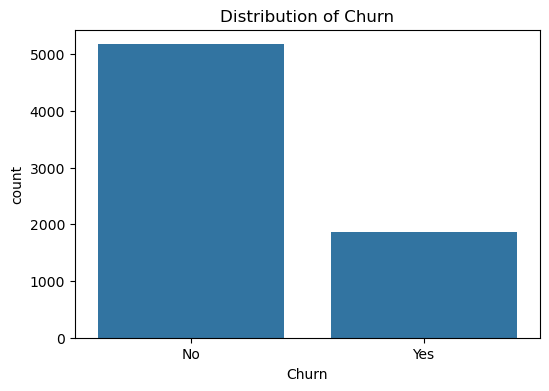

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

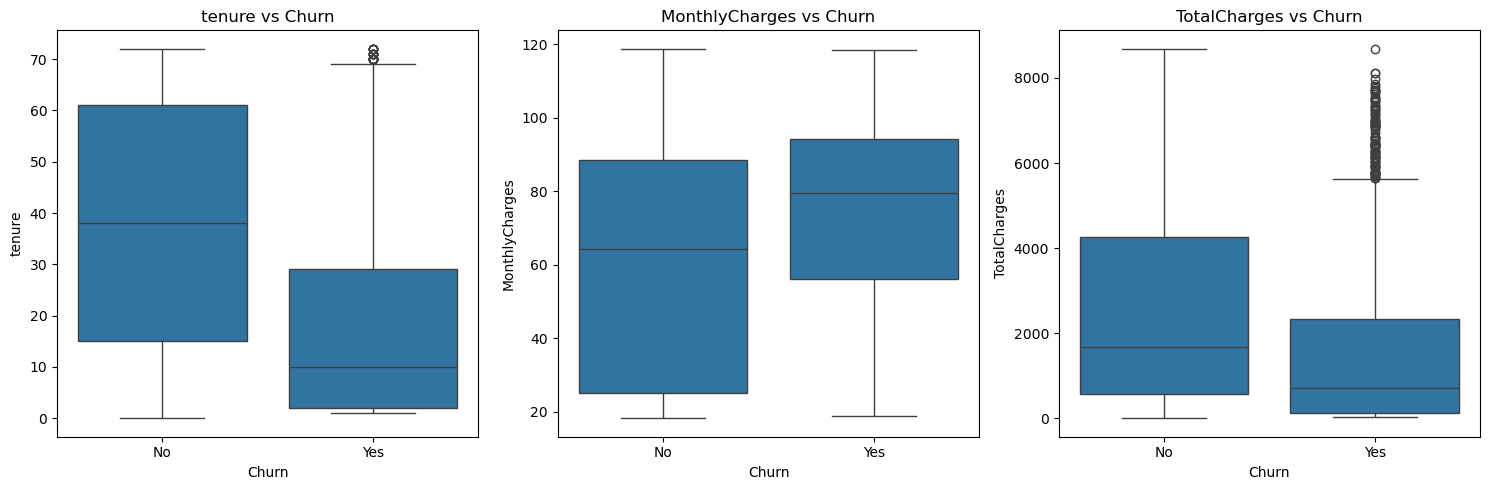

In [49]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} vs Churn')
plt.tight_layout()
plt.show()

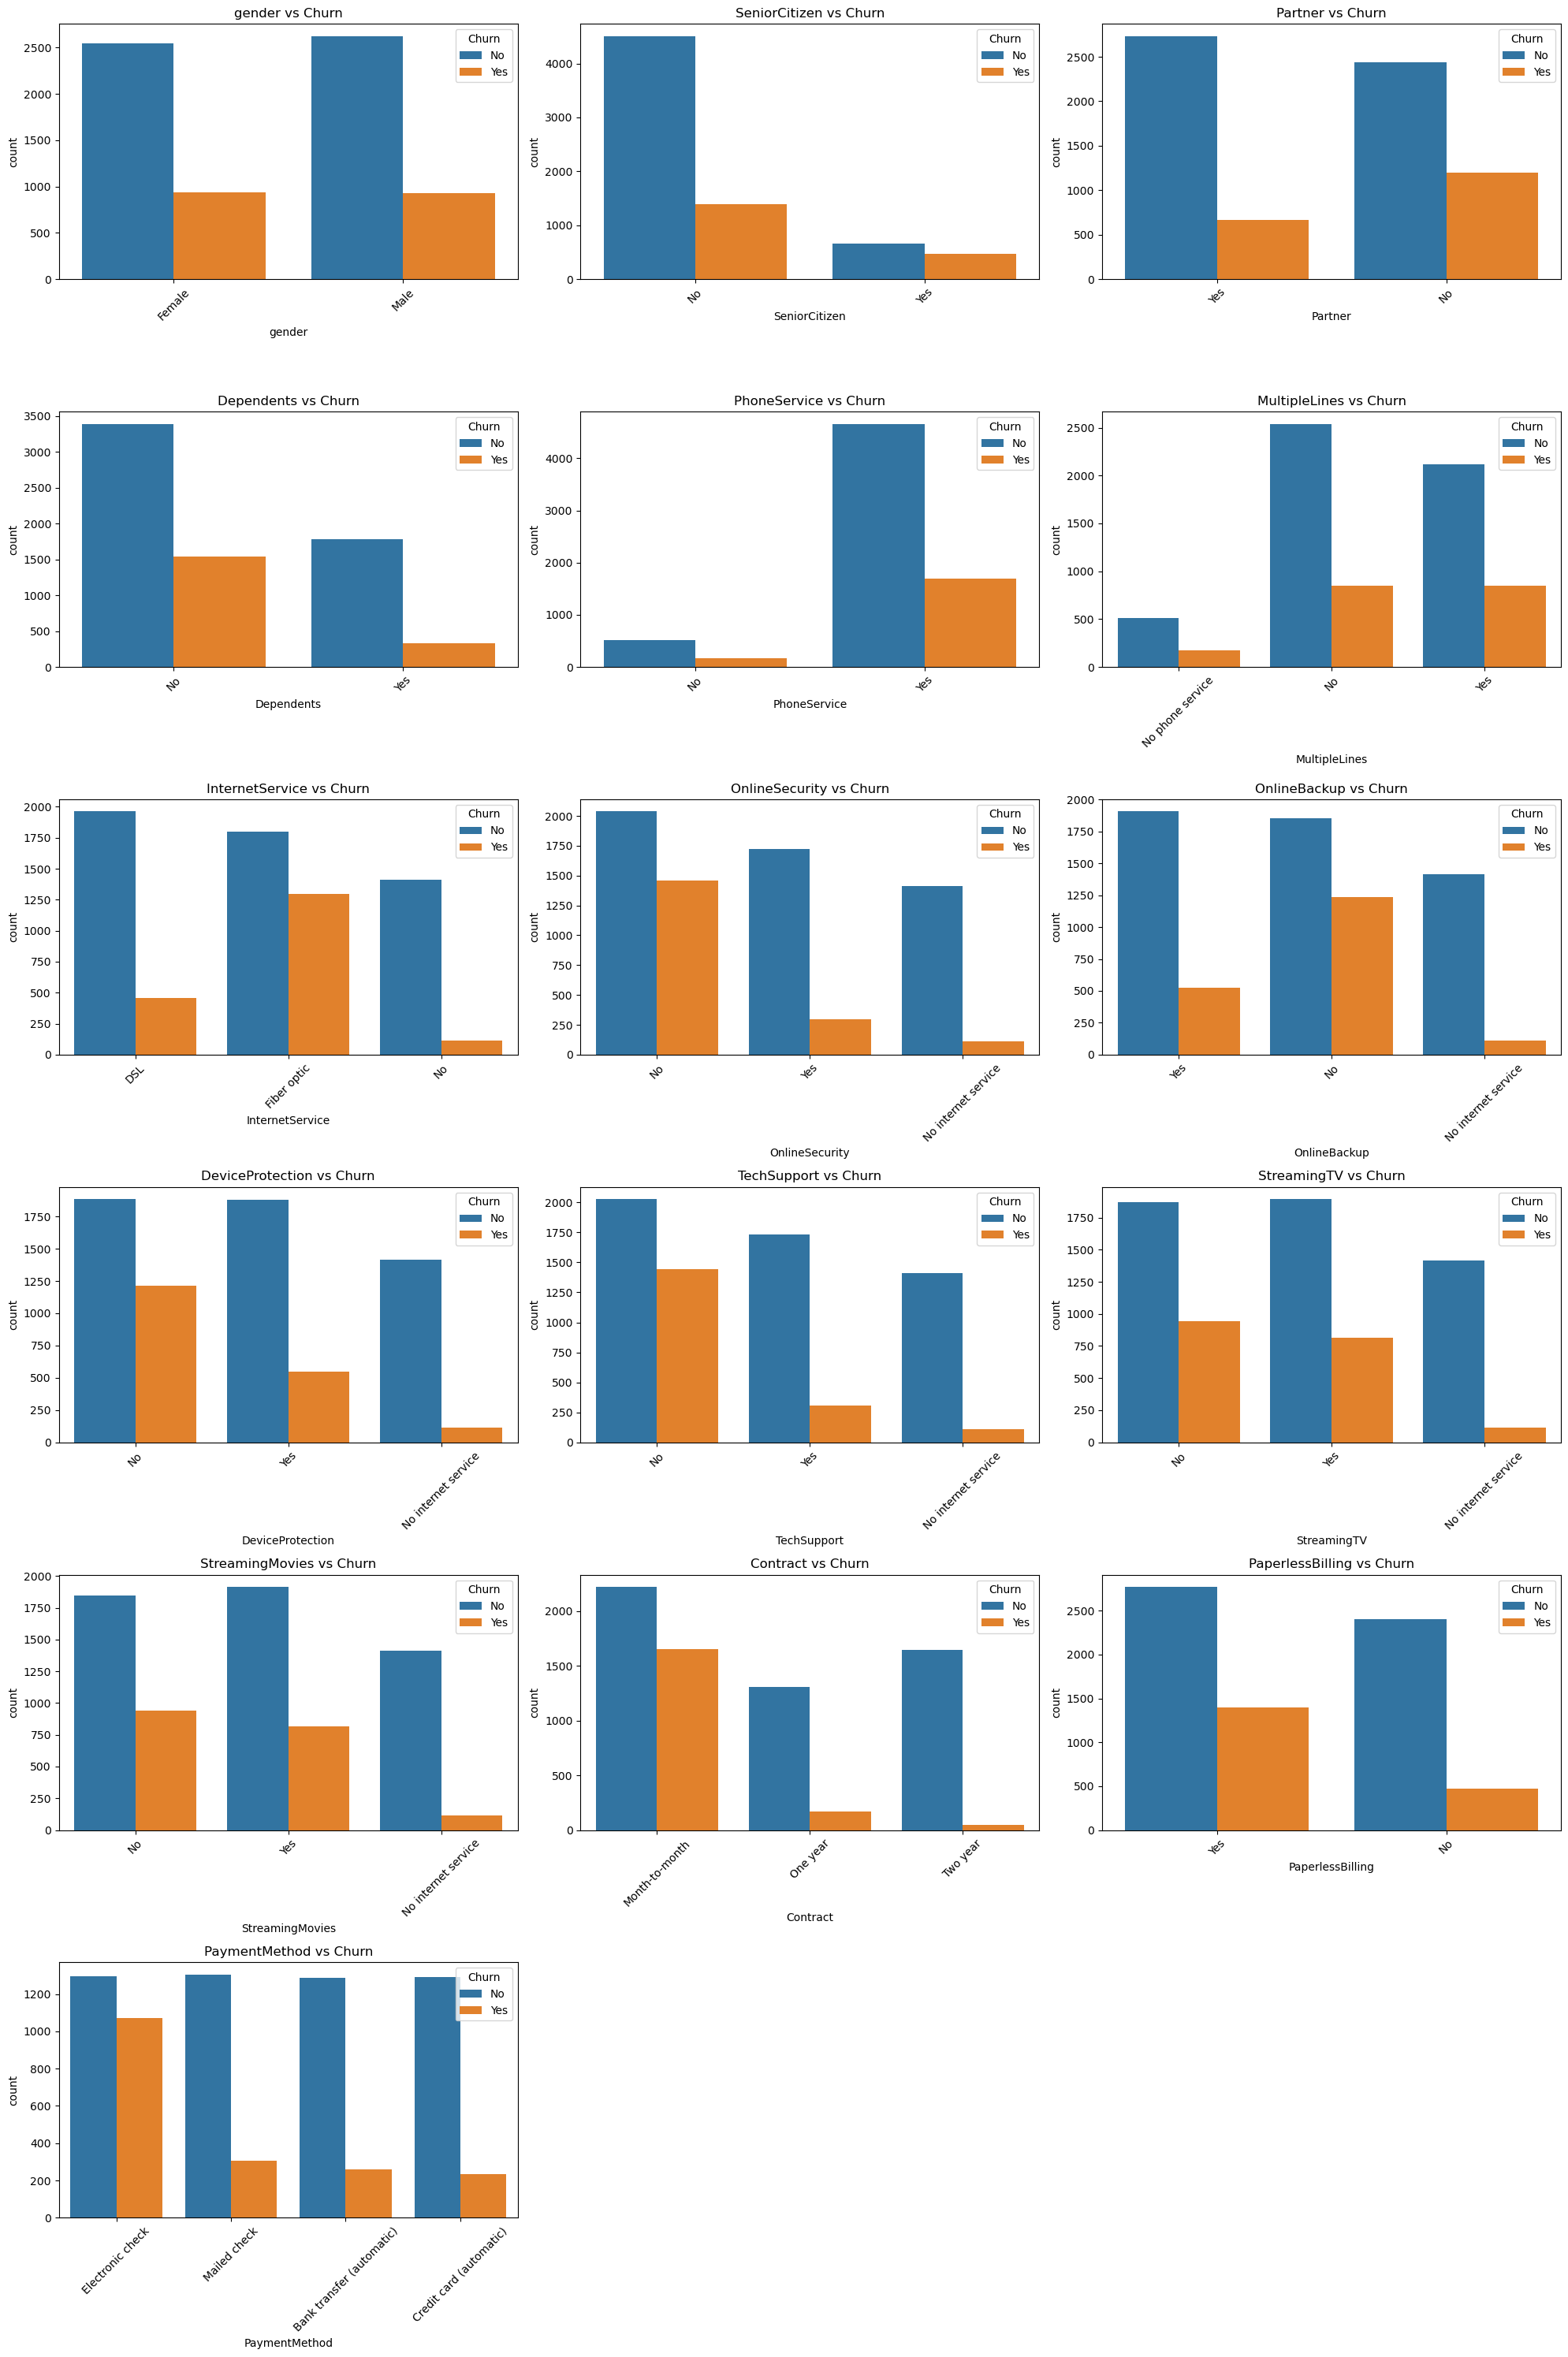

In [50]:
categorical_features = [col for col in df.columns if df[col].dtype == 'object' and col != 'Churn']
plt.figure(figsize=(20, 30))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'{feature} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                         labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])

In [52]:
df['HasInternetService'] = df['InternetService'].apply(lambda x: 'No' if x == 'No' else 'Yes')

In [53]:
df['MultipleServices'] = df.apply(lambda row: 'Yes' if ((row['PhoneService'] == 'Yes') and 
                                                     (row['InternetService'] != 'No')) else 'No', axis=1)

In [54]:
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'No': 0, 'Yes': 1})

In [55]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

In [57]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    if y_proba is not None:
        print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    return model

In [58]:
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])
lr_model = evaluate_model(lr, X_train, y_train, X_test, y_test)

Confusion Matrix:
 [[926 109]
 [165 209]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC AUC Score: 0.8420341522643313


In [59]:
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_model = evaluate_model(rf_grid.best_estimator_, X_train, y_train, X_test, y_test)

Confusion Matrix:
 [[937  98]
 [180 194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC Score: 0.8401637861995919


In [60]:
xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False))
])
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
xgb_model = evaluate_model(xgb_grid.best_estimator_, X_train, y_train, X_test, y_test)


Confusion Matrix:
 [[935 100]
 [177 197]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

ROC AUC Score: 0.8448900772430185


In [61]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
input_shape = X_train_preprocessed.shape[1]

In [62]:
def create_nn_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model


In [63]:
nn_model = create_nn_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = nn_model.fit(
    X_train_preprocessed, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

In [72]:
nn_model = create_nn_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [73]:
print("\nTraining Neural Network...")
history = nn_model.fit(
    X_train_preprocessed, 
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1  # Show progress
)


Training Neural Network...
Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6502 - auc: 0.6853 - loss: 0.7314 - val_accuracy: 0.7773 - val_auc: 0.8054 - val_loss: 0.4832
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7714 - auc: 0.7809 - loss: 0.5007 - val_accuracy: 0.7870 - val_auc: 0.8140 - val_loss: 0.4513
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7516 - auc: 0.7775 - loss: 0.5022 - val_accuracy: 0.7853 - val_auc: 0.8184 - val_loss: 0.4515
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7802 - auc: 0.8121 - loss: 0.4537 - val_accuracy: 0.7799 - val_auc: 0.8240 - val_loss: 0.4479
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7888 - auc: 0.8352 - loss: 0.4362 - val_accuracy: 0.7950 - val_auc: 0.8272 - val_loss: 0.4364
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7966 - auc: 0.8267 - loss: 0.4400 - val_accuracy: 0.7950 - val_auc: 0.8259 - val_loss: 0.4378
Epoch 7/50


In [74]:
print("\nNeural Network Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nn):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_nn):.4f}")


Neural Network Performance:
Accuracy: 0.7991
Precision: 0.6463
Recall: 0.5374
F1 Score: 0.5869
ROC AUC: 0.8400


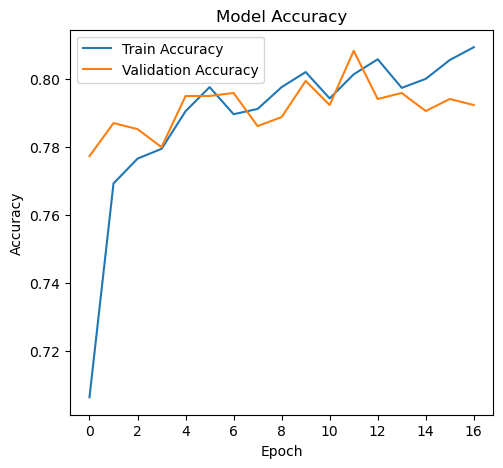

In [75]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

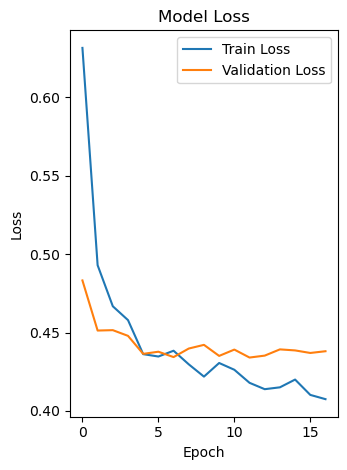

In [76]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_features = cat_encoder.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, cat_features])

In [66]:
feature_importances = rf_model.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

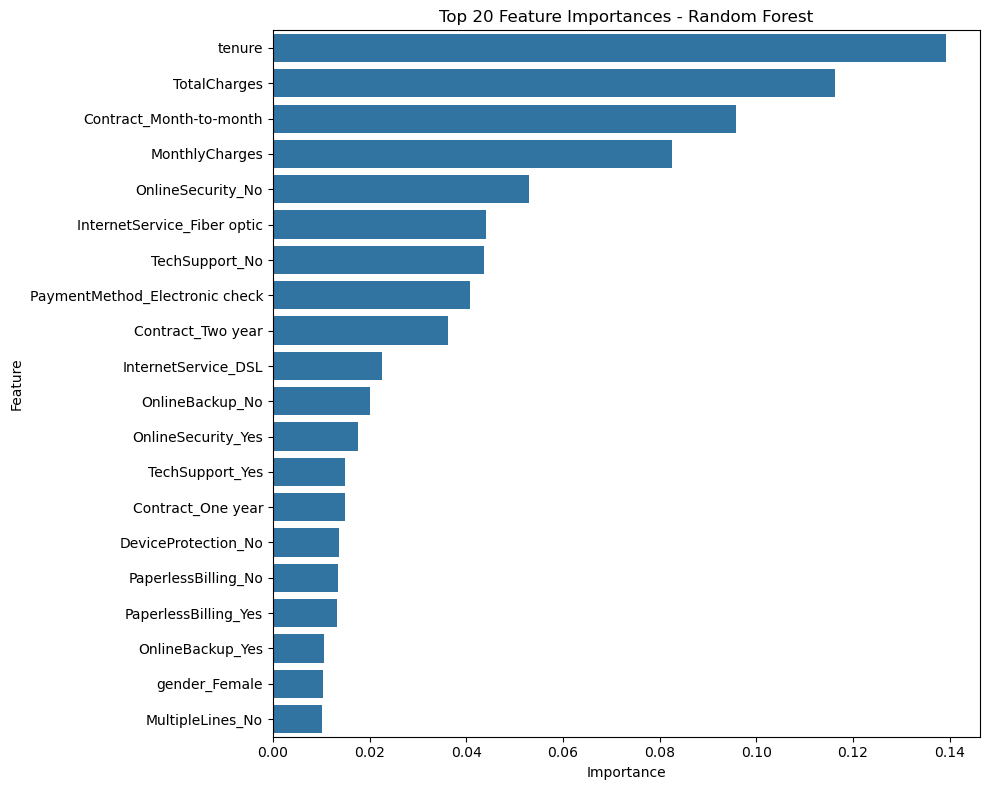

In [67]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [68]:
sample_idx = np.random.choice(X_test.shape[0], min(500, X_test.shape[0]), replace=False)
X_test_sample = X_test.iloc[sample_idx]
explainer = shap.TreeExplainer(rf_model.named_steps['classifier'])
X_test_processed = rf_model.named_steps['preprocessor'].transform(X_test_sample)
shap_values = explainer.shap_values(X_test_processed)

<Figure size 1000x800 with 0 Axes>

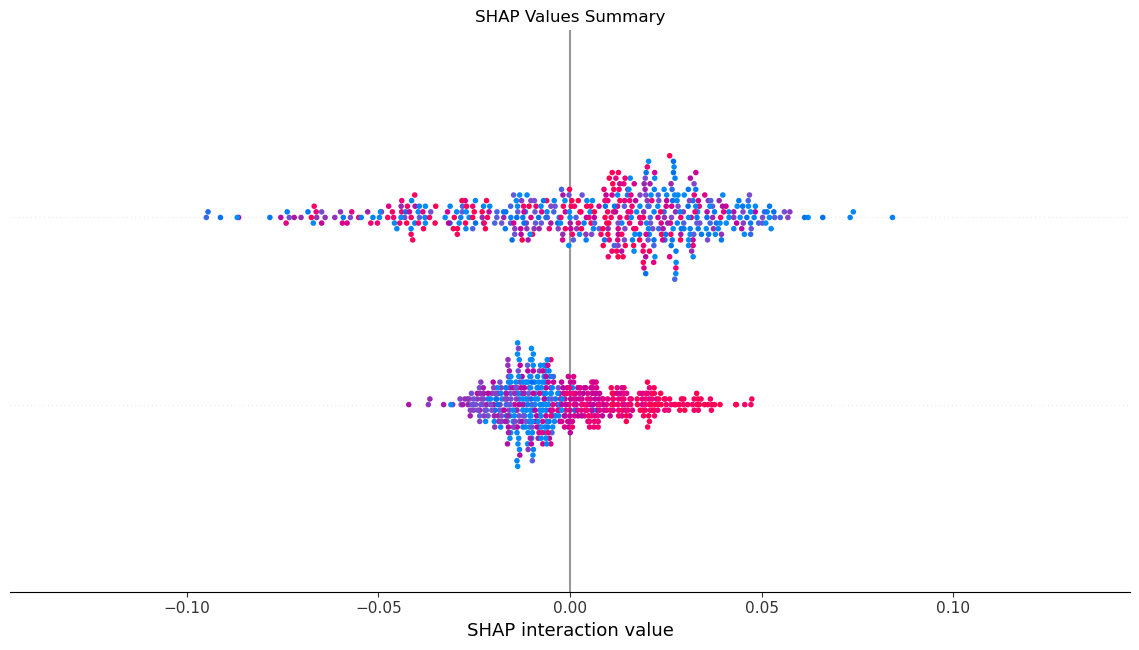

In [69]:
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_processed, feature_names=all_features, show=False)
plt.title('SHAP Values Summary')
plt.tight_layout()
plt.show()

In [70]:
print("\nBusiness Recommendations:")
print("1. Focus retention efforts on month-to-month contract customers")
print("2. Target customers with higher MonthlyCharges for special offers")
print("3. Improve fiber optic service quality and support")
print("4. Develop loyalty programs for long-tenured customers")
print("5. Offer incentives for customers to add tech support services")


Business Recommendations:
1. Focus retention efforts on month-to-month contract customers
2. Target customers with higher MonthlyCharges for special offers
3. Improve fiber optic service quality and support
4. Develop loyalty programs for long-tenured customers
5. Offer incentives for customers to add tech support services


In [82]:
customer_data = {
    'gender': 'Male',
    'SeniorCitizen': 'No',
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 34,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'One year',
    'PaperlessBilling': 'No',
    'PaymentMethod': 'Mailed check',
    'MonthlyCharges': 56.95,
    'TotalCharges': 1889.50,
    'TenureGroup': '24-36',
    'HasInternetService': 'Yes',
    'MultipleServices': 'Yes'
}

customer_df = pd.DataFrame([customer_data])

prediction = lr_model.predict(customer_df)
prediction_proba = lr_model.predict_proba(customer_df)

churn_status = "Will Churn" if prediction[0] == 1 else "Will Not Churn"
confidence = prediction_proba[0][prediction[0]] * 100

print(f"Prediction: {churn_status} (Confidence: {confidence:.1f}%)")

Prediction: Will Not Churn (Confidence: 95.8%)


In [85]:
import sklearn
print(sklearn.__version__)

1.5.1


In [86]:
from joblib import dump
dump(lr_model, 'lr_churn_model.joblib') 

['lr_churn_model.joblib']